
<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>CRISP-DM Methodology</center></h3>

* [Buissness Understanding](#1)
* [Data Understanding](#2)
* [Data Preparation](#3)
* [Data Modeling](#4)   
* [Data Evaluation](#5)

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.
## Buissness Understanding

    Tasks:

    1.Determine business objectives

    2.Assess situation

    3.Determine data mining goals

    4.Produce project plan

## Data Understanding
     Tasks:

    1.Collect data

    2.Describe data

    3.Explore data    

## Data Preparation
    Tasks
    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

            Steps:

            Data cleaning

            Data integration

            Data sampling

            Data dimensionality reduction

            Data formatting

            Data transformation

            Scaling

            Aggregation

            Decomposition

## Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

    Tasks
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

## Data Evaluation :
    Tasks

    1.Evaluate Result

    2.Review Process

    3.Determine next steps

<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Buissness Understanding</center></h3>

    
The dataset is used for this competition is synthetic but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting the amount of an insurance claim. Although the features are anonymized, they have properties relating to real-world features.

**Eval Metric**: Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target
    
<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Understanding</center></h3>

    
## Step 1: Import helpful libraries

In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline


from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV

import lightgbm as lgbm
from catboost import CatBoostRegressor
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from itertools import combinations
#import smong 

import category_encoders as ce
import warnings
import optuna 
warnings.filterwarnings('ignore')


## Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [ ]:
# import lux
# Load the training data
train = pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
# Preview the data
train.head()

## EDA 

### Explore the data

    Null Data
    Categorical data
    Itrain.isnull().sum().valuess there Text data
    wich columns will we use
    IS there outliers that can destory our algo
    IS there diffrent range of data
    Curse of dimm...
    

####  Null Data 
**How sparse is my data?**
Most data sets contain missing values, often represented as NaN (Not a Number). If you are working with Pandas you can easily check how many missing values exist in each column.

In [ ]:
train.isnull().sum().values

In [ ]:
test.isnull().sum().values

In [ ]:
features1=train.drop(['id','claim'], axis=1).copy()
# Checking 'NaN' values.
def missing_percentage(df):
    
    """A function for returning missing ratios."""
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
               100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                     100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing = missing_percentage(features1)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

we have a lot of null data : 

**Filling null values**

Sometimes rather than dropping NA values, you'd rather replace them with a valid value. *This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.*

**Number of rows with at least 5 missing value:**




In [ ]:
train[train.isnull().sum(axis=1) >=5].shape

In [ ]:
train[train.isnull().sum(axis=1) >=8].shape

In [ ]:
# summarize the number of rows with missing values for each column
for i in range(train.shape[1]):
    # count number of rows with missing values
    n_miss = train.iloc[:,i].isnull().sum()
    perc = n_miss / train.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

In [ ]:
df = pd.DataFrame()
df["n_missing"] = train.drop(["id", "claim"], axis=1).isna().sum(axis=1)
df["claim"] = train["claim"].copy()

fig, ax = plt.subplots(figsize=(12,5))
ax.hist(df[df["claim"]==0]["n_missing"],
        bins=40, edgecolor="black",
        color="darkseagreen", alpha=0.7, label="claim is 0")
ax.hist(df[df["claim"]==1]["n_missing"],
        bins=40, edgecolor="black",
        color="darkorange", alpha=0.7, label="claim is 1")
ax.set_title("Missing values distributionin in each target class", fontsize=20, pad=15)
ax.set_xlabel("Missing values per row", fontsize=14, labelpad=10)
ax.set_ylabel("Amount of rows", fontsize=14, labelpad=10)
ax.legend()
plt.show();


In order to see the impact of null values for each row, we'll create a count of the null values for that row and store it in a null_count feature. Then, we can group by the null_count values, and see how many rows contain 0, 1, 2, 3, or more null values.size=14)


In [ ]:
# summarize the number of rows with missing values for each column
for i in range(test.shape[1]):
    # count number of rows with missing values
    n_miss = test.iloc[:,i].isnull().sum()
    perc = n_miss / test.shape[0] * 100
    print('> %d, Missing test data: %d (%.1f%%)' % (i, n_miss, perc))

In [ ]:
# Count the number of null values that occur in each row
train["null_count"] = train.isnull().sum(axis=1)

# Group the null counts
counts = train.groupby("null_count")["claim"].count().to_dict()
null_data = {"{} Null Value(s)".format(k) : v for k, v in counts.items() if k < 6}
null_data["6 or More Null Values"] = sum([v for k, v in enumerate(counts.values()) if k > 5])

# Plot the null count results
pie, ax = plt.subplots(figsize=[20, 10])
plt.pie(x=null_data.values(), autopct="%.2f%%", explode=[0.05]*len(null_data.keys()), labels=null_data.keys(), pctdistance=0.5)
_ = plt.title("Percentage of Null Values Per Row (Train Data)", fontsize=14)

* * * * ### Duplicates 

In [ ]:
train.duplicated(subset='id', keep='first').sum()

In [ ]:
len(train)-len(train.drop_duplicates())

## Outlier Identification
### Skewness : 

Skewness is computed for each row or each column of the data present in the DataFrame object.


Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 

**Important Notes:**

· If the skewness is between **-0.5 and 0.5**, the data are **fairly symmetrical**

· If the skewness is between **-1 and — 0.5** or between **0.5 and 1**, the **data are moderately skewed**

· If the skewness is **less than -1 or greater than 1**, the data are **highly skewed**

In [ ]:
skew =train.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_df.head()

In [ ]:
skew_df[(skew_df['skew']>=1) |(skew_df['skew']<=-1) ].index

In [ ]:
ax = sns.distplot(train['f32'])

In [ ]:
sns.boxplot(data=train['f32'], saturation=.3)

In [ ]:
trainessai= train.copy()
trainessai['f32_log'] = np.log(train['f32' ])

print(train['f32'].skew())

print(trainessai['f32_log'].skew())

In [ ]:
ax = sns.distplot(trainessai['f32_log'])

### Kurtosis 

**Describe:**

· Kurtosis is one of the two measures that quantify shape of a distribution. **kutosis determine the volume of the outlier**

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. 

· Kurtosis describes the peakedness of the distribution.

· If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

· A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

· A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

· Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0.

**Important Notes:**

· Along with skewness, kurtosis is an important descriptive statistic of data distribution. However, the two concepts must not be confused with each other. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

· It is the sharpness of the peak of a frequency-distribution curve .It is actually the measure of outliers present in the distribution.

· **High kurtosis** in a data set is an indicator that **data has heavy outliers**.

· **Low kurtosis** in a data set is an indicator that **data has lack of outliers.**

    The kurtosis of a normal distribution is 3.
    If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
    If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

In [ ]:
kurtosis= pd.DataFrame(train.kurtosis(),columns=['Kurtosis'])
kurtosis.head()

In [ ]:
kurtosis[(kurtosis['Kurtosis']>=3) |(kurtosis['Kurtosis']<=-3) ].index

In [ ]:
sns.boxplot(data=train['f3'], saturation=.5)

In [ ]:
ax = sns.distplot(trainessai['f3'])

### Variance : 
Features with low variance should be eliminated

In [ ]:
var= train.var().sort_values(ascending =True )
var_df= pd.DataFrame({'var':var})
var_df.head(5)

In [ ]:
ax = sns.distplot(train['f107'])

In [ ]:
train['f107'].describe()

### Quantile data :

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

In [ ]:
df_out = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_out.shape)

**IQR Score**

This technique uses the IQR scores calculated earlier to remove outliers. 

The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. 



# Convert Dtypes : 

In [ ]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
train.describe().T

### Visual Exploratory 

In [ ]:
# Comparing the datasets length
fig, ax = plt.subplots(figsize=(5, 5))
pie = ax.pie([len(train), len(test)],
             labels=["Train dataset", "Test dataset"],
             colors=["salmon", "teal"],
             textprops={"fontsize": 15},
             autopct='%1.1f%%')
ax.axis("equal")
ax.set_title("Dataset length comparison", fontsize=18)
fig.set_facecolor('white')
plt.show

### Num/Cat Features 

In [ ]:
cat_columns = train.drop(['id','claim'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','claim'], axis=1).select_dtypes(include=['int64','float64']).columns

### Numerical features distribution
#### Histograms of numerical features

In [ ]:
# Numerical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(5, 2,figsize=(20, 24))
for feature in num_columns[0:10]:
    plt.subplot(5, 2,i)
    sns.histplot(train[feature],color="blue", kde=True,bins=100, label='train')
    sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

df= pd.concat([train.drop(["id", "claim"], axis=1), test.drop("id", axis=1)], axis=0)
columns = df.columns.values

cols = 4
rows = len(columns) // cols + 1

fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(16,130), sharex=False)

plt.subplots_adjust(hspace = 0.3)
i=0

for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            hist1 = axs[r, c].hist(train[columns[i]].values,
                                   range=(df[columns[i]].min(),
                                          df[columns[i]].max()),
                                   bins=40,
                                   color="deepskyblue",
                                   edgecolor="black",
                                   alpha=0.7,
                                   label="Train Dataset")
            hist2 = axs[r, c].hist(test[columns[i]].values,
                                   range=(df[columns[i]].min(),
                                          df[columns[i]].max()),
                                   bins=40,
                                   color="palevioletred",
                                   edgecolor="black",
                                   alpha=0.7,
                                   label="Test Dataset")
            axs[r, c].set_title(columns[i], fontsize=12, pad=5)
            axs[r, c].set_yticks(axs[r, c].get_yticks())
            axs[r, c].set_yticklabels([str(int(i/1000))+"k" for i in axs[r, c].get_yticks()])
            axs[r, c].tick_params(axis="y", labelsize=10)
            axs[r, c].tick_params(axis="x", labelsize=10)
            axs[r, c].grid(axis="y")
            axs[r, c].legend(fontsize=13)
                                  
        i+=1
#plt.suptitle("Feature values distribution in both datasets", y=0.99)
plt.show();

**Histograms : numerical data seems to be similar to train numerical data.**
### Zooming on the correlation between numerical variables and target.

In [ ]:
train.corr()['claim'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('Correlation between target and numerical variables',fontsize=14);

It's clear tat there isn't any clear relation between numerical variables and target.

Now Exploring correlation between all numerical variables. First we get a correlation grid of all numercial variables and target


### Correlation 

In [ ]:
train.corr().style.background_gradient(cmap='viridis')

### Box plot of numerical columns

In [ ]:
v0 = sns.color_palette(palette='viridis').as_hex()[0]
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=train[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of train numerical columns', fontsize=16);

### Test data 

fig = plt.figure(figsize=(18,6))
sns.boxplot(data=test[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of test numerical columns', fontsize=16);

Numerical Data seems to be with few outliers appearing in the box plot Also test numerical data seems to looks like the train ones.


## Target 

In [ ]:
fig = plt.figure(figsize=(30,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =1
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.violinplot(data =  train.iloc[0:5000,:], y = 'f'+str(n), x = 'claim',ax=ax, alpha =.7, fill=True,palette='viridis')
        ax.set_title('f'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Violin plot of target with categorical features', fontsize=16,y=.93);

###  KDE plot of target with  features 

In [ ]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(3,2,figure=fig,hspace=.2,wspace=.2)
n =1
for i in range(3):
    for j in range(2):
        ax = fig.add_subplot(grid[i, j])
        sns.kdeplot(data = train.iloc[0:2000,:], y = 'f'+str(n),  hue = 'claim',ax=ax, alpha =.7, fill=False)
        ax.set_title('f'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('KDE plot of train target with  features', fontsize=16,y=.93);

This plot kinda agrees with previous one but it looks like the KDE of some categorical values are pretty much flat compared to other value.

###  exploring target data main statistics

In [ ]:
train.claim.value_counts()

In [ ]:
# Categorical features distribution 
plt.figure()
sns.countplot(train['claim'], label='claim')
plt.xlabel(feature, fontsize=9); plt.legend()
plt.xticks(rotation=45)
plt.show()

## Dtypes 

In [ ]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

## t-SNE visualization of high-dimensional data

t-SNE intuition t-SNE is super powerful, but do you know exactly when to use it? When you want to visually explore the patterns in a high dimensional dataset. 


In [ ]:
m = TSNE(learning_rate=50)
df_numeric =train.drop(['id','claim'], axis=1).iloc[:50000,:]._get_numeric_data()
df_numeric=df_numeric.dropna()
# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
%timeit 
print(tsne_features.shape)

In [ ]:
dataa=train.drop(['id'], axis=1).iloc[:50000,:].dropna()
dataa['x']=tsne_features[:, 0]
dataa['y']=tsne_features[:, 1]
# Color the points according to Army Component
sns.scatterplot(x='x', y='y', hue='claim', data=dataa)
# Show the plot
plt.show()

# Kmeans : 


In [ ]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import  RobustScaler 
from yellowbrick.cluster import KElbowVisualizer
# Split the data into training and test set
pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median',add_indicator=True)),
                    ('QuantileTransformer', QuantileTransformer(output_distribution='uniform'))])
X_train =pipe.fit_transform(train.drop(['id','claim'], axis=1))

In [ ]:
# Define K-means model 
kmeans = MiniBatchKMeans( random_state=42)

visualizer = KElbowVisualizer(kmeans, k=(1,40))

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans1 = MiniBatchKMeans(n_clusters=6 ,random_state=42)
kmean_label1= kmeans1.fit_predict(X_train)
print(kmean_label1)

In [ ]:
clus = KMeans(n_clusters=2, max_iter=2000)
kmean_label= clus.fit_predict(X_train)
print(kmean_label)

In [ ]:
#Getting the Centroids
centroids = kmeans1.cluster_centers_ 
#Getting unique labels
u_labels = np.unique(kmean_label1)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(train.iloc[kmean_label1 == i ,1] , train.iloc[kmean_label1 == i , 2] , label = i)

#plt.scatter(centroids[:,1] , centroids[:,2] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
#Getting the Centroids
centroids = clus.cluster_centers_ 
#Getting unique labels
u_labels = np.unique(kmean_label)
#plotting the results:
 
for i in u_labels:
    plt.scatter(train.iloc[kmean_label == i , 1] , train.iloc[kmean_label == i , 2] , label = i)
#plt.scatter(centroids[:,1] , centroids[:,2] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
train1=train.copy()
train1['cluster1'] = kmean_label1 
train1['cluster1'] = train1['cluster1'].astype('category')
train1['cluster'] = kmean_label 
train1['cluster'] = train1['cluster'].astype('category')

In [ ]:
import seaborn as sns 
red = sns.light_palette("red", as_cmap=True)
cross_tab=pd.crosstab(train1['cluster'], train1['claim'], margins = True)
H=cross_tab/cross_tab.loc["All"] # Divide by column totals
H.style.background_gradient(cmap=red)

In [ ]:
cross_tab

In [ ]:
import seaborn as sns 
red = sns.light_palette("red", as_cmap=True)
cross_tab1=pd.crosstab(train1['cluster1'], train1['claim'], margins = True)
H=cross_tab1/cross_tab1.loc["All"] # Divide by column totals
H.style.background_gradient(cmap=red)

In [ ]:
cross_tab1

In [ ]:
fig = plt.figure(figsize=(18,26))#,constrained_layout=True)
grid =  gridspec.GridSpec(3, 2, figure= fig, hspace= .2, wspace= .05)
n =1
for i in range(3):
    for j in range(2):
        ax = fig.add_subplot(grid[i, j])
        sns.scatterplot(data=train1, y='f'+str(n+1), x='f'+str(n), hue= 'cluster', ax=ax, palette='viridis', alpha=.6 )
        ax.set_title('f{}'.format(str(n)),fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend(loc='lower left',ncol=20)
        n += 1
        
fig.suptitle('Scatter plot of Target, Numerical and Cluster features', fontsize=20,y=.90)
fig.text(0.11,0.5, "Claim", ha="center", va="center", rotation=90, fontsize=18);

## Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

##  What should we do for each colmun
### Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
### Cat Features 

In [ ]:
# select non-numeric columns
cat_columns = train.drop(['id','claim'], axis=1).select_dtypes(exclude=['int64','float64']).columns

### Num Features 

In [ ]:
# select the float columns
num_columns = train.drop(['id','claim'], axis=1).select_dtypes(include=['int64','float64']).columns

In [ ]:
all_columns = (num_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

## check that we have all column

In [ ]:
if set(all_columns) == set(train.drop(['id','claim'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Data Preparation</center></h3>

## Data preprocessing

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling:

Outlier Handling

Scaling

Feature Engineering

Feature Selection 




<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Data Modeling</center></h3>

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Data Evaluation  </center></h3>




**ROC Curve**

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

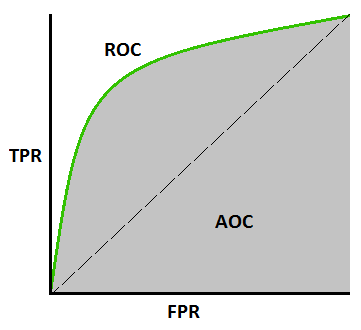


we have done all EDA needed to chose the best preprocessing steps and begin modeling .
Work is in progress .. 

Upvote if you find it useful .